### CNN using grid search cross validation

In [6]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import ParameterGrid

The *ParameterGrid* function from scikit-learn takes a dictionary of hyperparameters and generates all possible combinations of those hyperparameters.

**Image Preprocessing**

In [7]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [8]:
testing_data_generator = ImageDataGenerator(
    rescale=1.0/255
)

In [9]:
training_dataset = training_data_generator.flow_from_directory(
    'Covid-19/train',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

Found 251 images belonging to 3 classes.


In [10]:
testing_dataset = testing_data_generator.flow_from_directory(
    'Covid-19/test',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

Found 66 images belonging to 3 classes.


**Parameter grid for which we can apply GridSearch Cross Validation**

In [11]:
param_grid = {
    'optimizer':['adam','sgd'],
    'units': [63,128,256],
    'pool_size':[(2,2),(3,3)]
}
best_accuracy = 0.0
best_params = {}
accuracies_train = []
accuracies_test = []

In [12]:
# Nested loop through hyperparameters
for params in ParameterGrid(param_grid):
    model = Sequential()
    model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=params['units'], activation='relu'))
    model.add(Dense(units=3, activation='softmax'))
    model.compile(optimizer=params['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(training_dataset, epochs=10, verbose=0)
    
    #training
    loss, accuracy_train = model.evaluate(training_dataset, verbose=0)
    accuracies_train.append(accuracy_train)

    #testing set
    loss, accuracy_test = model.evaluate(testing_dataset, verbose=0)
    accuracies_test.append(accuracy_test)

    print(f"Parameters: {params}, Training Accuracy: {accuracy_train}, Test Accuracy: {accuracy_test}")
    
    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_params = params
    
print("Best Parameters: ", best_params)
print("Best Accuracy: ", best_accuracy)

Parameters: {'optimizer': 'adam', 'pool_size': (2, 2), 'units': 63}, Training Accuracy: 0.9203187227249146, Test Accuracy: 0.9242424368858337
Parameters: {'optimizer': 'adam', 'pool_size': (2, 2), 'units': 128}, Training Accuracy: 0.8207171559333801, Test Accuracy: 0.7121211886405945
Parameters: {'optimizer': 'adam', 'pool_size': (2, 2), 'units': 256}, Training Accuracy: 0.8725099563598633, Test Accuracy: 0.7424242496490479
Parameters: {'optimizer': 'adam', 'pool_size': (3, 3), 'units': 63}, Training Accuracy: 0.9163346886634827, Test Accuracy: 0.8636363744735718
Parameters: {'optimizer': 'adam', 'pool_size': (3, 3), 'units': 128}, Training Accuracy: 0.9282868504524231, Test Accuracy: 0.9090909361839294
Parameters: {'optimizer': 'adam', 'pool_size': (3, 3), 'units': 256}, Training Accuracy: 0.9163346886634827, Test Accuracy: 0.9090909361839294
Parameters: {'optimizer': 'sgd', 'pool_size': (2, 2), 'units': 63}, Training Accuracy: 0.7609561681747437, Test Accuracy: 0.6969696879386902
Par

In [13]:
import matplotlib.pyplot as plt

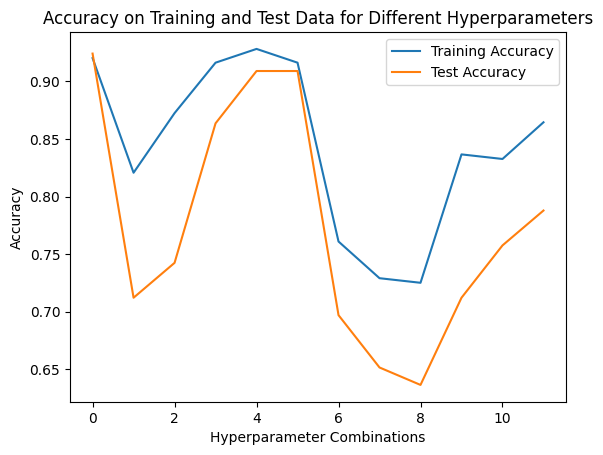

In [14]:
# Plotting
plt.plot(accuracies_train, label='Training Accuracy')
plt.plot(accuracies_test, label='Test Accuracy')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Accuracy')
plt.title('Accuracy on Training and Test Data for Different Hyperparameters')
plt.legend()
plt.show()


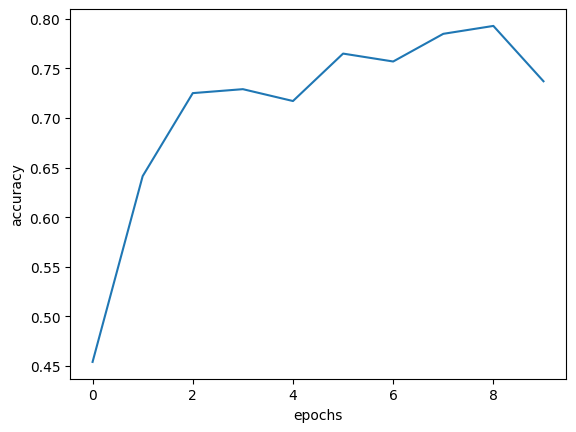

In [15]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

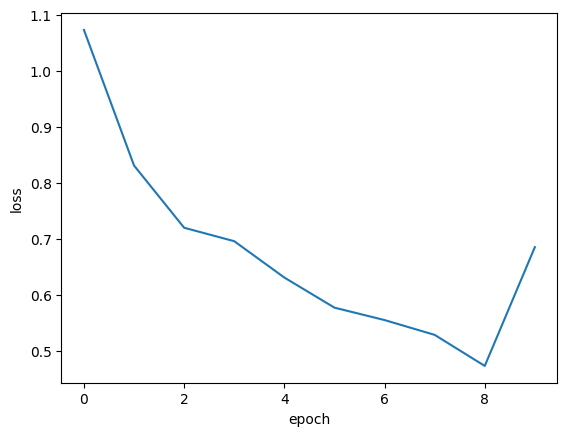

In [16]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()